In [ ]:
import os
import csv
import datetime
import random
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import shutil
import torch
import torch.nn as nn
import torch.optim as optim
from sklearn.metrics import accuracy_score
#!pip install --upgrade --force-reinstall --no-deps kaggle

In [ ]:
from google.colab import drive
drive.mount("/content/drive", force_remount=True)

Mounted at /content/drive


In [ ]:
import json

TOKEN = {"username":"<kaggle-username>","key":"<kaggle-key>"}

! pip install kaggle==1.5.12
! mkdir -p .kaggle
! mkdir -p /content & mkdir -p /content/.kaggle & mkdir -p /root/.kaggle/

with open('/content/.kaggle/kaggle.json', 'w') as file:
    json.dump(TOKEN, file)

! pip install --upgrade --force-reinstall --no-deps kaggle
! ls "/content/.kaggle"
! chmod 600 /content/.kaggle/kaggle.json
! cp /content/.kaggle/kaggle.json /root/.kaggle/

! kaggle config set -n path -v /content

     |████████████████████████████████| 58 kB 4.6 MB/s 
  Created wheel for kaggle: filename=kaggle-1.5.12-py3-none-any.whl size=73051 sha256=2b55c2c504205979e9b8a8e021c1de2a9a790b570546c1804a4a628bb1bb0805
  Stored in directory: /root/.cache/pip/wheels/62/d6/58/5853130f941e75b2177d281eb7e44b4a98ed46dd155f556dc5
Successfully built kaggle
  Attempting uninstall: kaggle
    Found existing installation: kaggle 1.5.12
    Uninstalling kaggle-1.5.12:
      Successfully uninstalled kaggle-1.5.12
kaggle.json
- path is now set to: /content


In [ ]:
! kaggle competitions download -c 11-785-s22-hw1p2
! unzip /content/competitions/11-785-s22-hw1p2/11-785-s22-hw1p2.zip

Streaming output truncated to the last 5000 lines.
  inflating: hw1p2_student_data/train-clean-100/transcript/7113-086041-020.npy  
  inflating: hw1p2_student_data/train-clean-100/transcript/7113-086041-021.npy  
  inflating: hw1p2_student_data/train-clean-100/transcript/7113-086041-022.npy  
  inflating: hw1p2_student_data/train-clean-100/transcript/7113-086041-023.npy  
  inflating: hw1p2_student_data/train-clean-100/transcript/7113-086041-024.npy  
  inflating: hw1p2_student_data/train-clean-100/transcript/7113-086041-025.npy  
  inflating: hw1p2_student_data/train-clean-100/transcript/7113-086041-026.npy  
  inflating: hw1p2_student_data/train-clean-100/transcript/7113-086041-027.npy  
  inflating: hw1p2_student_data/train-clean-100/transcript/7113-086041-028.npy  
  inflating: hw1p2_student_data/train-clean-100/transcript/7113-086041-029.npy  
  inflating: hw1p2_student_data/train-clean-100/transcript/7113-086041-030.npy  
  inflating: hw1p2_student_data/train-clean-100/transcript

In [ ]:

#!cp /content/competitions/11-785-s22-hw1p2/11-785-s22-hw1p2.zip /content/drive/MyDrive/CMU/Spring2022/11785-Intro-to-Deep-Learning/hw1/data
!cp /content/drive/MyDrive/CMU/Spring2022/11785-Intro-to-Deep-Learning/hw1/data/train_filenames_subset_8192_v2.csv /content
!cp /content/drive/MyDrive/CMU/Spring2022/11785-Intro-to-Deep-Learning/hw1/data/train_filenames_subset_0008_v2.csv /content
!cp /content/drive/MyDrive/CMU/Spring2022/11785-Intro-to-Deep-Learning/hw1/data/train_filenames_subset_0512_v2.csv /content
!cp /content/drive/MyDrive/CMU/Spring2022/11785-Intro-to-Deep-Learning/hw1/data/train_filenames_subset_2048_v2.csv /content

In [ ]:
from torch.nn.modules.dropout import Dropout
from torch.nn.modules.batchnorm import BatchNorm1d
class Network(torch.nn.Module):
    def __init__(self, context, try_activation=False, activation_func=None):
        super(Network, self).__init__()
        # TODO: Please try different architectures
        in_size = (1+2*context)*13
        layers = []
        if try_activation:
            if activation_func is None:
                activation_func = nn.ReLU()
            layers = [
                nn.Linear(in_size, 40),
                activation_func,
                #nn.Linear(512, 40)
            ]
        else:
            layers = [
                nn.Linear(in_size, 1024),
                nn.BatchNorm1d(1024),
                activation_func,
                nn.Dropout(p=0.25), 

                nn.Linear(1024, 2048),
                nn.BatchNorm1d(2048),
                activation_func,
                nn.Dropout(p=0.25), 

                nn.Linear(2048, 4096),
                nn.BatchNorm1d(4096),
                activation_func,
                nn.Dropout(p=0.25), 

                nn.Linear(4096, 4096),
                nn.BatchNorm1d(4096),
                activation_func,
                nn.Dropout(p=0.25), 

                nn.Linear(4096, 4096),
                nn.BatchNorm1d(4096),
                activation_func,
                nn.Dropout(p=0.25), 

                nn.Linear(4096, 2048),
                nn.BatchNorm1d(2048),
                activation_func,
                nn.Dropout(p=0.25), 

                nn.Linear(2048, 1024),
                nn.BatchNorm1d(1024),
                activation_func,
                nn.Dropout(p=0.25), 

                nn.Linear(1024, 512),
                nn.BatchNorm1d(512),
                activation_func,
                nn.Dropout(p=0.25), 

                nn.Linear(512, 40)
                #nn.Softmax(dim=1) --> not needed, since pyTorch already include softmax in CrossEntropyLoss
                # Dropout in later layer might not helpful
            ]
        self.layers = nn.Sequential(*layers)
        self.layers.apply(self.init_param)

    def init_param(self, param):
      if type(param) == nn.Linear:
          ##test
        print("weight initiallization applied")
        #nn.init.kaiming_normal_(param.weight)
        #nn.init.uniform_(param.weight)
        #nn.init.normal_(param.weight)
        nn.init.kaiming_uniform_(param.weight)
        #nn.init.xavier_uniform_(param.weight)
        #nn.init.xavier_normal_(param.weight)


    def forward(self, A0):
        x = self.layers(A0)
        return x

    # def initial_weights(model):
    #     torch.nn.init.kaiming_normal

In [ ]:

class LibriSamples(torch.utils.data.Dataset):
    def __init__(self, data_path, sample=20000, shuffle=True, partition="dev-clean", csvpath=None, train=True):
        # sample represent how many npy files will be preloaded for one __getitem__ call
        self.sample = sample 
        self.train = train
        
        if train:
            self.X_dir = data_path + "/" + partition + "/mfcc/"
            self.Y_dir = data_path + "/" + partition +"/transcript/"
        
            self.X_names = os.listdir(self.X_dir)
            self.Y_names = os.listdir(self.Y_dir)

        else:
            self.X_dir = data_path + "/" + partition + "/mfcc/"
            self.X_names = os.listdir(self.X_dir)

        # using a small part of the dataset to debug
        if csvpath:
            if train:
                subset = self.parse_csv(csvpath)
                self.X_names = [i for i in self.X_names if i in subset]
                self.Y_names = [i for i in self.Y_names if i in subset]
            else:
                self.X_names = list(pd.read_csv(csvpath).file)
        # if csvpath:
        #     subset = self.parse_csv(csvpath)
        #     self.X_names = [i for i in self.X_names if i in subset]
        #     self.Y_names = [i for i in self.Y_names if i in subset]
        
        if shuffle == True and train:
            XY_names = list(zip(self.X_names, self.Y_names))
            random.shuffle(XY_names)
            self.X_names, self.Y_names = zip(*XY_names)
        
        if train:
            assert(len(self.X_names) == len(self.Y_names))
        self.length = len(self.X_names)
        
        self.PHONEMES = [
            'SIL',   'AA',    'AE',    'AH',    'AO',    'AW',    'AY',  
            'B',     'CH',    'D',     'DH',    'EH',    'ER',    'EY',
            'F',     'G',     'HH',    'IH',    'IY',    'JH',    'K',
            'L',     'M',     'N',     'NG',    'OW',    'OY',    'P',
            'R',     'S',     'SH',    'T',     'TH',    'UH',    'UW',
            'V',     'W',     'Y',     'Z',     'ZH',    '<sos>', '<eos>']
      
    @staticmethod
    def parse_csv(filepath):
        subset = []
        with open(filepath) as f:
            f_csv = csv.reader(f)
            for row in f_csv:
                subset.append(row[1])
        return subset[1:]

    def __len__(self):
        return int(np.ceil(self.length / self.sample))
        
    def __getitem__(self, i):
        sample_range = range(i*self.sample, min((i+1)*self.sample, self.length))
        
        if self.train:
            X, Y = [], []
            for j in sample_range:
                X_path = self.X_dir + self.X_names[j]
                Y_path = self.Y_dir + self.Y_names[j]
                
                label = [self.PHONEMES.index(yy) for yy in np.load(Y_path)][1:-1]

                X_data = np.load(X_path)
                X_data = (X_data - X_data.mean(axis=0))/X_data.std(axis=0)
                X.append(X_data)
                Y.append(np.array(label))
                
            X, Y = np.concatenate(X), np.concatenate(Y)
            return X, Y
        else:
            X = []
            for j in sample_range:
                X_path = self.X_dir + self.X_names[j]

                X_data = np.load(X_path)
                X_data = (X_data - X_data.mean(axis=0))/X_data.std(axis=0)
                X.append(X_data)
                
            X = np.concatenate(X)
            return X
    
class LibriItems(torch.utils.data.Dataset):
    def __init__(self, X, Y, context = 0):
        assert(X.shape[0] == Y.shape[0])
        
        self.length  = X.shape[0]
        self.context = context

        if context == 0:
            self.X, self.Y = X, Y
        else:
            # TODO: self.X, self.Y = ... 
            # Option 1: concatenate utterances and pad at the first and the end
            self.X = np.pad(X, ((context, context), (0, 0)), 'constant', constant_values=0)
            self.Y = Y
            # Option 2: pad each utterance with K 0-valued vectors
            # self.X = X
            # for i, x in enumerate(self.X):
            #     print(x.shape)
            #     self.X[i] = np.pad(x, ((context, context), (0, 0)), 'constant', constant_values=0)
            # self.Y = Y
        
    def __len__(self):
        return self.length
        
    def __getitem__(self, i):
        if self.context == 0:
            xx = self.X[i].flatten()
            yy = self.Y[i]
        else:
            # TODO xx, yy = ...
            # Option 1:
            start_i = i
            end_i = i + (2*self.context+1)
            xx = self.X[start_i:end_i].flatten()
            yy = self.Y[i]
            # Option 2:
            # xx = self.X[i][self.context, :]
            # yy = self.Y[i]
        
        return xx, yy
    



In [ ]:
## For Quiz
# x = LibriSamples(data_path="/content/hw1p2_student_data", partition="dev-clean")
# Y_dir = "/content/hw1p2_student_data/dev-clean/transcript/"
# Y_names = os.listdir(Y_dir)
# counter = {}
# for name in Y_names:
#   Y_path = Y_dir + name
#   label = [yy for yy in np.load(Y_path)][1:-1]
#   for l in label:
#     if l not in counter:
#       counter[l] = 1
#     else:
#       counter[l] += 1
# print(counter)
# most_common = sorted(counter.items(), key=lambda item:item[1], reverse=False)
# print(most_common)

weight initiallization applied
weight initiallization applied
weight initiallization applied
weight initiallization applied
weight initiallization applied
weight initiallization applied
weight initiallization applied
weight initiallization applied
weight initiallization applied
Directory 'model-2022-02-16T04:14:08' created.
Train Epoch: 1 [0/25377542 (0%)]	Loss: 5.073730
Train Epoch: 1 [1638400/25377542 (6%)]	Loss: 1.335012
Train Epoch: 1 [3276800/25377542 (13%)]	Loss: 1.117314
Train Epoch: 1 [4915200/25377542 (19%)]	Loss: 1.072922
Train Epoch: 1 [6553600/25377542 (26%)]	Loss: 0.941187
Train Epoch: 1 [8192000/25377542 (32%)]	Loss: 0.976635
Train Epoch: 1 [9830400/25377542 (39%)]	Loss: 0.941335
Train Epoch: 1 [11468800/25377542 (45%)]	Loss: 0.897412
Train Epoch: 1 [13107200/25377542 (52%)]	Loss: 0.902028
Train Epoch: 1 [14745600/25377542 (58%)]	Loss: 0.860593
Train Epoch: 1 [16384000/25377542 (65%)]	Loss: 0.860341
Train Epoch: 1 [18022400/25377542 (71%)]	Loss: 0.855464
Train Epoch: 1 [1

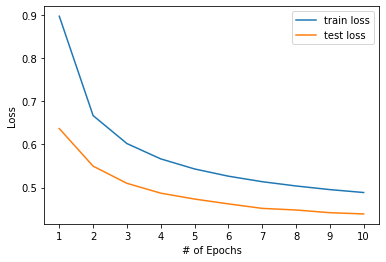

In [ ]:
from math import gamma


def train(args, model, device, train_samples, optimizer, criterion, epoch):
    model.train()
    train_loss = np.zeros(len(train_samples))
    train_sample_portion = np.zeros(len(train_samples))
    for i in range(len(train_samples)):
        X, Y = train_samples[i]
        train_items = LibriItems(X, Y, context=args['context'])
        #train_loader = torch.utils.data.DataLoader(train_items, batch_size=args['batch_size'], shuffle=True, num_workers=-1, pin_memory=True)
        train_loader = torch.utils.data.DataLoader(train_items, batch_size=args['batch_size'], shuffle=True)

        batch_loss = np.zeros(len(train_loader))
        batch_portion = np.zeros(len(train_loader))
        for batch_idx, (data, target) in enumerate(train_loader):
            data = data.float().to(device)
            target = target.long().to(device)

            #optimizer.zero_grad()
            for p in model.parameters(): p.grad=None

            output = model(data)
            loss = criterion(output, target)
            loss.backward()
            optimizer.step()
            
            if batch_idx % args['log_interval'] == 0 and args['show_log']:
                print('Train Epoch: {} [{}/{} ({:.0f}%)]\tLoss: {:.6f}'.format(
                    epoch, batch_idx * len(data), len(train_loader.dataset),
                    100. * batch_idx / len(train_loader), loss.item()))
            batch_loss[batch_idx] = loss.item()
            batch_portion[batch_idx] = data.shape[0] / X.shape[0]
        
        train_loss[i] = batch_loss.transpose().dot(batch_portion)
        train_sample_portion[i] = X.shape[0]
    train_sample_portion = train_sample_portion / np.sum(train_sample_portion)

    return train_loss.transpose().dot(train_sample_portion)


def test(args, model, device, dev_samples, criterion):
    model.eval()
    true_y_list = []
    pred_y_list = []
    dev_losses = np.zeros(len(dev_samples))
    dev_losses_portion = np.zeros(len(dev_samples))
    with torch.no_grad():
        for i in range(len(dev_samples)):
            X, Y = dev_samples[i]

            test_items = LibriItems(X, Y, context=args['context'])
            test_loader = torch.utils.data.DataLoader(test_items, batch_size=args['batch_size'], shuffle=False)

            batch_loss = np.zeros(len(test_loader))
            batch_portion = np.zeros(len(test_loader))
            for batch_idx, (data, true_y) in enumerate(test_loader):
                data = data.float().to(device)
                true_y = true_y.long().to(device)                
                
                output = model(data)
                pred_y = torch.argmax(output, axis=1)
                loss = criterion(output, true_y)

                pred_y_list.extend(pred_y.tolist())
                true_y_list.extend(true_y.tolist())
                
                batch_loss[batch_idx] = loss.item()
                batch_portion[batch_idx] = data.shape[0] / X.shape[0]
            
            dev_losses[i] = batch_loss.transpose().dot(batch_portion)
            dev_losses_portion[i] = X.shape[0]
    dev_losses_portion = dev_losses_portion / np.sum(dev_losses_portion)
    train_accuracy =  accuracy_score(true_y_list, pred_y_list)
    dev_loss = dev_losses.transpose().dot(dev_losses_portion)

    return train_accuracy, dev_loss

def validation():
    device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

    context_range = np.random.randint(low=1, high=51, size=10)

    acc_list = []

    for i in range(10):
        torch.cuda.empty_cache()
        args = {
            'batch_size': 2048,
            'context': context_range[i],
            'log_interval': 1000,
            'LIBRI_PATH': '/content/hw1p2_student_data',
            'lr': 0.0001,
            'epoch': 10
        }
        decay = 1e-4
        model = Network(args['context']).to(device)
        optimizer = optim.Adam(model.parameters(), lr=args['lr'], weight_decay=decay)
        criterion = torch.nn.CrossEntropyLoss()
        scheduler = torch.optim.lr_scheduler.ReduceLROnPlateau(optimizer, factor=0.1, patience=3, mode='max')

        train_samples = LibriSamples(data_path = args['LIBRI_PATH'], shuffle=True, partition="train-clean-100", csvpath="/content/train_filenames_subset_8192_v2.csv")
        dev_samples = LibriSamples(data_path = args['LIBRI_PATH'], shuffle=True, partition="dev-clean")

        for epoch in range(1, args['epoch'] + 1):
            train(args, model, device, train_samples, optimizer, criterion, epoch)
            epoch_acc = test(args, model, device, dev_samples)
            scheduler.step(epoch_acc)
        
        test_acc = test(args, model, device, dev_samples)
        acc_list.append(test_acc)
        print(f"Accuracy with context {args['context']}: {test_acc}")
        torch.save(model.state_dict(), "/content/path_contest_"+str(args['context'])+"_lr_"+str(args['lr'])[2:]+".pth")

    best_context_idx = np.argmax(acc_list)
    print(f"\nThe best context is: {context_range[best_context_idx]}")

    args = {
        'batch_size': 2048,
        'context': context_range[best_context_idx],
        'log_interval': 800,
        'show_log': True, 
        'LIBRI_PATH': '/content/hw1p2_student_data',
        'lr': 0.001,
        'epoch': 10
    }

    return args

def compare_activation():
    args = {
        'batch_size': 2048,
        'context': 16,
        'log_interval': 800,
        'show_log': False, 
        'LIBRI_PATH': '/content/hw1p2_student_data',
        'lr': 0.001,
        'epoch': 3
    }
    device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

    func_list = [
            nn.ELU(alpha=1.0),
            nn.Hardshrink(0.5),
            nn.Hardsigmoid(),
            nn.Hardtanh(min_val=-1.0, max_val=1.0),
            nn.Hardswish(), 
            nn.LeakyReLU(negative_slope=0.01),
            nn.LogSigmoid(),
            nn.PReLU(),
            nn.ReLU(), 
            nn.ReLU6(), 
            nn.RReLU(), 
            nn.SELU(), 
            nn.CELU(), 
            nn.GELU(), 
            nn.Sigmoid(), 
            nn.SiLU(), 
            nn.Mish(), 
            nn.Softplus(), 
            nn.Softshrink(), 
            nn.Softsign(), 
            nn.Tanh(), 
            nn.Tanhshrink()
    ]

    func_acc = []
    for idx, func in enumerate(func_list):
        params = ""
        for key, val in vars(func).items():
            if not key.startswith('_'):
                if key!='training' and key!='inplace':
                    params += f"{key}={val}, "
        params = params[:-2]
        print(f"Now running on activation function: {type(func).__name__}({params})")
        model = Network(args['context'], try_activation=True, activation_func=func).to(device)
        optimizer = optim.Adam(model.parameters(), lr=args['lr'])
        criterion = torch.nn.CrossEntropyLoss()

        train_samples = LibriSamples(data_path = args['LIBRI_PATH'], shuffle=True, partition="train-clean-100", csvpath="/content/train_filenames_subset_8192_v2.csv")
        dev_samples = LibriSamples(data_path = args['LIBRI_PATH'], shuffle=True, partition="dev-clean")

        test_acc = 0
        print("Epoch: ", end='')
        for epoch in range(1, args['epoch'] + 1):
            print(f"{epoch}... ", end='')
            train(args, model, device, train_samples, optimizer, criterion, epoch)
            test_acc = test(args, model, device, dev_samples)
            #print('Dev accuracy ', test_acc)
            #torch.save(model.state_dict(), "/content/path_epoch_"+str(epoch)+".pth")

        func_acc.append(test_acc)

        print(f"\nCompleted on: {params}\nAccuracy is: {test_acc}\n")
        
    for func, acc in zip(func_list, func_acc):
        params = ""
        for key, val in vars(func).items():
            if not key.startswith('_'):
                if key!='training' and key!='inplace':
                    params += f"{key}={val}, "
        params = params[:-2]
        print(f"{type(func).__name__}({params}):\t\t{acc}")

def remedy(args):
    last_epoch = 1
    shutil.copy('', "/content/")
    device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

    decay = 1e-6
    model = Network(args['context'], activation_func=nn.Softplus()).to(device)
    model.load_state_dict(torch.load("/content/path_epoch_10.pth"))

    optimizer = optim.Adam(model.parameters(), lr=args['lr'], weight_decay=decay)
    criterion = torch.nn.CrossEntropyLoss()
    #scheduler = torch.optim.lr_scheduler.StepLR(optimizer, step_size=30, gamma=0.1)
    scheduler = torch.optim.lr_scheduler.ReduceLROnPlateau(optimizer, factor=0.6, patience=1, mode='max')
    
    # If you want to use full Dataset, please pass None to csvpath
    train_samples = None
    path = None
    if args['train_full']:
        # When training full dataset, create a directory in Google Drive to store the model
        timestamp = "model-" + datetime.datetime.now().isoformat(timespec='seconds')
        dir_path = "/content/drive/MyDrive/CMU/Spring2022/11785-Intro-to-Deep-Learning/hw1/models/"
        path = os.path.join(dir_path, timestamp)
        os.mkdir(path)
        print(f"Directory '{timestamp}' created.")
        train_samples = LibriSamples(data_path = args['LIBRI_PATH'], shuffle=True, partition="train-clean-100", csvpath=None)
    else:
        train_samples = LibriSamples(data_path = args['LIBRI_PATH'], shuffle=True, partition="train-clean-100", csvpath="/content/train_filenames_subset_8192_v2.csv")
    
    dev_samples = LibriSamples(data_path = args['LIBRI_PATH'], shuffle=True, partition="dev-clean")

    train_losses = []
    dev_losses = []
    for epoch in range(last_epoch, args['epoch'] + 1):
        torch.cuda.empty_cache()
        train_loss = train(args, model, device, train_samples, optimizer, criterion, epoch)
        train_losses.append(train_loss)
        test_acc, dev_loss = test(args, model, device, dev_samples, criterion)
        dev_losses.append(dev_loss)
        print('Dev accuracy ', test_acc)
        scheduler.step(test_acc)
        model_path = "/content/path_epoch_"+str(epoch)+".pth"
        torch.save(model.state_dict(), model_path)
        if args['train_full']:
            shutil.copy(model_path, path)
            print(f"\"{model_path}\" SAVED in Drive!")
        
    plt.plot(range(1, args['epoch']+1), train_losses, label = "train loss")
    plt.plot(range(1, args['epoch']+1), dev_losses, label = "test loss")
    plt.legend()
    plt.xticks(range(1, args['epoch']+1))
    plt.xlabel("# of Epochs")
    plt.ylabel("Loss")
    plt.show()

def main(args):
    device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

    decay = 1e-6
    model = Network(args['context'], activation_func=nn.Softplus()).to(device)
    #optimizer = optim.Adam(model.parameters(), lr=args['lr'], weight_decay=decay)
    optimizer = optim.AdamW(model.parameters(), lr=args['lr'])
    criterion = torch.nn.CrossEntropyLoss()
    #scheduler = torch.optim.lr_scheduler.StepLR(optimizer, step_size=30, gamma=0.1)
    scheduler = torch.optim.lr_scheduler.ReduceLROnPlateau(optimizer, factor=0.8, patience=3, mode='max')
    
    # If you want to use full Dataset, please pass None to csvpath
    train_samples = None
    path = None
    if args['train_full']:
        # When training full dataset, create a directory in Google Drive to store the model
        timestamp = "model-" + datetime.datetime.now().isoformat(timespec='seconds')
        dir_path = "/content/drive/MyDrive/CMU/Spring2022/11785-Intro-to-Deep-Learning/hw1/models/"
        path = os.path.join(dir_path, timestamp)
        os.mkdir(path)
        print(f"Directory '{timestamp}' created.")
        train_samples = LibriSamples(data_path = args['LIBRI_PATH'], shuffle=True, partition="train-clean-100", csvpath=None)
    else:
        train_samples = LibriSamples(data_path = args['LIBRI_PATH'], shuffle=True, partition="train-clean-100", csvpath="/content/train_filenames_subset_8192_v2.csv")
    
    dev_samples = LibriSamples(data_path = args['LIBRI_PATH'], shuffle=True, partition="dev-clean")

    train_losses = []
    dev_losses = []
    for epoch in range(1, args['epoch'] + 1):
        torch.cuda.empty_cache()
        train_loss = train(args, model, device, train_samples, optimizer, criterion, epoch)
        train_losses.append(train_loss)
        test_acc, dev_loss = test(args, model, device, dev_samples, criterion)
        dev_losses.append(dev_loss)
        print('Dev accuracy ', test_acc)
        scheduler.step(test_acc)
        model_path = "/content/path_epoch_"+str(epoch)+".pth"
        torch.save(model.state_dict(), model_path)
        if args['train_full']:
            shutil.copy(model_path, path)
            print(f"\"{model_path}\" SAVED in Drive!")
        
    plt.plot(range(1, args['epoch']+1), train_losses, label = "train loss")
    plt.plot(range(1, args['epoch']+1), dev_losses, label = "test loss")
    plt.legend()
    plt.xticks(range(1, args['epoch']+1))
    plt.xlabel("# of Epochs")
    plt.ylabel("Loss")
    plt.show()


if __name__ == '__main__':
    args = {
        'batch_size': 2048,
        'context': 30,
        'log_interval': 800,
        'show_log': True, 
        'LIBRI_PATH': '/content/hw1p2_student_data',
        'lr': 0.001,
        'epoch': 10, 
        'train_full': True
    }
    #args = validation()
    #compare_activation()
    main(args)
    #remedy(args)

In [ ]:
# x = nn.ReLU()
# print(type(x).__name__)
# print([f"{key}={val}" for key, val in vars(x).items() if not key.startswith('_')])
# params = ""
# for key, val in vars(x).items():
#     if not key.startswith('_'):
#         if key!='training' and key!='inplace':
#             params += f"{key}={val}, "
# params = params[:-2]
# print(f"{type(x).__name__}({params})")

In [ ]:
!cp /content/path_epoch_10.pth /content/drive/MyDrive/CMU/Spring2022/11785-Intro-to-Deep-Learning/hw1
#!cp /content/path_epoch_17.pth /content/drive/MyDrive/CMU/Spring2022/11785-Intro-to-Deep-Learning/hw1
#!cp /content/path_epoch_3.pth /content/drive/MyDrive/CMU/Spring2022/11785-Intro-to-Deep-Learning/hw1

In [ ]:
class LibriItemsPredict(torch.utils.data.Dataset):
    def __init__(self, X, context=0):
        self.length = X.shape[0]
        self.context = context

        if context == 0:
            self.X = X
        else:
            # TODO: self.X, self.Y = ... 
            # Option 1: concatenate utterances and pad at the first and the end
            self.X = np.pad(X, ((context, context), (0, 0)), 'constant', constant_values=0)
            # Option 2: pad each utterance with K 0-valued vectors
            # self.X = X
            # for i, x in enumerate(self.X):
            #     print(x.shape)
            #     self.X[i] = np.pad(x, ((context, context), (0, 0)), 'constant', constant_values=0)
            # self.Y = Y
        
    def __len__(self):
        return self.length
        
    def __getitem__(self, i):
        if self.context == 0:
            xx = self.X[i].flatten()
        else:
            # TODO xx, yy = ...
            # Option 1:
            start_i = i
            end_i = i + (2*self.context+1)
            xx = self.X[start_i:end_i].flatten()
            # Option 2:
            # xx = self.X[i][self.context, :]
            # yy = self.Y[i]
        
        return xx

In [ ]:
def predict(args, model, device, test_samples):
    model.eval()
    pred_y_list = []
    with torch.no_grad():
        for i in range(len(test_samples)):
            X = test_samples[i]
            

            test_items = LibriItemsPredict(X, context=args['context'])
            test_loader = torch.utils.data.DataLoader(test_items, batch_size=args['batch_size'], shuffle=False)

            for data in test_loader:
                data = data.float().to(device)               
                
                output = model(data)
                pred_y = torch.argmax(output, axis=1)

                pred_y_list.extend(pred_y.tolist())

    return pred_y_list

In [ ]:
#!cp /content/drive/MyDrive/CMU/Spring2022/11785-Intro-to-Deep-Learning/hw1/models/model-2022-02-13T21:58:19/path_epoch_10.pth /content/

In [ ]:
args = {
        'batch_size': 2048,
        'context': 30,
        'log_interval': 800,
        'show_log': True, 
        'LIBRI_PATH': '/content/hw1p2_student_data',
        'lr': 0.001,
        'epoch': 10, 
        'train_full': True
    }

device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
loaded_model = Network(args['context'], activation_func=nn.Softplus()).to(device)
loaded_model.load_state_dict(torch.load("/content/path_epoch_10.pth"))

test_data = LibriSamples(data_path = args['LIBRI_PATH'], shuffle=False, partition="test-clean", csvpath="/content/test_order.csv", train=False)
pred_y_list = predict(args, loaded_model, device, test_data)



weight initiallization applied
weight initiallization applied
weight initiallization applied
weight initiallization applied
weight initiallization applied
weight initiallization applied
weight initiallization applied
weight initiallization applied
weight initiallization applied


In [ ]:
len(pred_y_list)

1943253

In [ ]:
df = pd.DataFrame(list(zip(range(len(pred_y_list)), pred_y_list)), columns = ['id', 'label'])
df.to_csv("/content/submission.csv", index=False)

In [ ]:
!kaggle competitions submit -c 11-785-s22-hw1p2 -f submission.csv -m "2-15 submission"

100% 18.6M/18.6M [00:02<00:00, 6.82MB/s]
Successfully submitted to Frame-Level Speech Recognition